# Decision Trees and Machine Learning
<li>Decision trees are tree structures containing rules
<li>The leaf nodes of the tree are the "learned" categories (or threshold values)
<li>A path from the root to a leaf node represents a rule
<h3>Example: A decision tree with rules on deciding who survived or died on the titanic</h3>
<i>Source: https://en.wikipedia.org/wiki/Decision_tree_learning#/media/File:CART_tree_titanic_survivors.png</i>
<li>To use the tree, enter a person-data object and you'll get an answer</li>
<li>Ex: ("John Brown","Male","30 years old", "3 siblings") Ans: Survived (89% probability)
<li>Ex: ("Jill Jones", "Female","7 years old", "no siblings") Ans: Survived (73% probability)
<li>Ex: ("Hercules Mulligan", "Male", "2 years old", "20 siblings") Ans: Died (17% probability)
<li>Note that the 17% probability doesn't mean that there is an 83% chance that Mulligan survived!

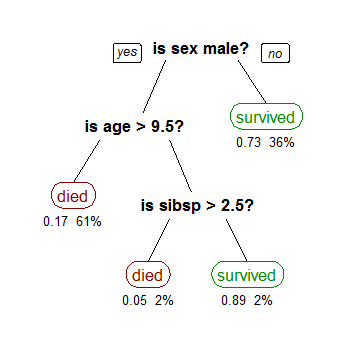

In [1]:
from IPython.display import Image
Image(filename = "CART_tree_titanic_survivors.png", width=400, height=400)

So we look at this, the is sex male and the no side of it that
is for females, then we see that there's
a 0.73% probability that the person survived the Titanic
whatever, sinking of the Titanic.
And we see that 36% of the total cases in our data set
are represented by this, so this is a pretty high confidence.
36% is a lot of cases.

Whereas, if you travel all the way down to these two,
died and survived at the bottom of siblings greater than 2.5,
the number of cases are just 2%.
And that's a kind of a low number of cases.
So what we're saying is that with a very small number
of cases, we're trying to make a guess as to whether they
survived or not.
And that's not so great.


<h2>Types of decision trees</h2>
Classification trees are used when there's a feature value,
like a rock or a mine, and regression trees when there are
continuous variables,
<ul>
<li><b>Classification trees</b>: Uses rules to classify cases into two or more categories (Rocks vs Mines)
<ul>
<li>Classification trees recursively split the data on a feature value
<li>Each split minimizes the cost (also known as the impurity)
<li>Cost is commonly measured using the GINI cost function (a measure of the probability of misclassification or 'purity')
</ul>
<li><b>Regression trees</b>: Uses rules to group data into target variable ranges (Wine Quality)

Typically, in regression trees, what you want to do
is you want to find groups like this, the _female survived_, that
are represented by a __large number__ of cases
so that you have a little more confidence in it.
And then that is probably a better bet.

<ul>
<li>Also split the data on feature values
<li>Minimize cost (impurity). Usually the mean squared error
</ul>
</ul>
And the whole idea in the tree is
to somehow find these splitting points, like should
be split on male/female first?
Should we split on age first?
Should we split on number of siblings first?
These are the kind of questions that are asked.
If we split on age, what should we split at?
9 1/2?
10, 11, 12, 20, 40, 60?
There are many choices.
Decision tree tries to figure out
what the splitting points are and which particular feature
it should split on first.

And the other thing in a decision tree
that you to watch out for is that though the tree is
__complete__, that means _every case can get processed through this_,
it might actually be better on some branches
and worse on other branches.

So you might want to just take some branches.
And the best example of that is if you have a trading strategy,
right?
In a trading strategy, what you're trying to do
is you're trying to predict whether you're
going to make money or not.
So what you might have is a whole bunch
of technical features and fundamental features
about a stock, and you can build out a huge decision tree.
What happens if the price-earnings ratio
is greater than something?
What happens if the price book is less than something,
the 10-day previous return is greater
than something, et cetera?
And you might find that only one set, that
is one branch of this whole thing, actually makes sense.
And that branch is good enough that you can buy and make money
on that.

That doesn't mean that--
the entire tree doesn't mean that you
can use every result of it.
Maybe you're missing out on many good trades,
but what you've done is, with some high confidence,
you identified some good trades, and so you go with that.

So the __nice thing, compared to regression, with a decision
tree is that you can focus on small parts
of your final outcome and ignore the other parts__ and say,
whether they work well or not, I don't care.
That's really the nice thing about a decision tree.

<h3>Stopping and Pruning Rules</h3>
<li>A minimum count of observations in each leaf node
<li>A maximum tree <b>depth</b>
<li>A maximum <b>complexity</b> (the number of splits)
<li>Using all three, you won't necessarily have a balanced tree

## Predicting wine quality using a decision tree
### Import the data

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
import pandas as pd
w_df = pd.read_csv(url,header=0,sep=';')
w_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
w_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
w_df.shape

(1599, 12)

#### Build train and test samples

In [5]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(w_df,test_size = 0.3)

x_train = train.iloc[0:,0:11]
y_train = train[['quality']]

x_test = test.iloc[0:,0:11]
y_test = test[['quality']]

# Use all data for cross-validation
x_data = w_df.iloc[0:,0:11]
y_data = w_df[['quality']]

y_test[:10]

,quality
856,6
745,6
1048,6
530,6
84,6
857,7
356,5
29,6
134,6
115,6


<h3>Classifiers vs Regressors</h3>
<li>Decision tree regressors are used when the target variable is continuous and ordered (wine quality from 0 to 10)
<li>Classifiers are used when the target variable is a set of unordered categories (rocks or mines)

#### For wine quality, we need a regressor

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree # to draw structure

model = DecisionTreeRegressor(max_depth = 3)
model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

#### Let's estimate the prediction.
The coefficient R^2 is defined as (1 - u/v), where 

- u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
- v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

The __best possible score is 1.0__ and it can be __negative__ (because the model can be arbitrarily worse). 

A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [7]:
#Get the R-Square for the predicted vs actuals on the text sample
print("Training R-Square",model.score(x_train,y_train))
print("Testing R-Square",model.score(x_test,y_test))

Training R-Square 0.340709769996
Testing R-Square 0.293874521075


And we get fairly low R-squareds, 0.36 and 0.25.
But again, note that though the R-squared is low,
we don't worry too much about it, because like I
said, maybe we want to focus only on identifying good wines.
So let's say our goal is we don't care about messing up
below 7.0 classification.
But anything above 7.0, we wanted to call it a good wine.
So if you can identify some good wines correctly,
then that would be great.
So R-squared is a good way to look at how good your model is.

# View the tree
<h3>Download and install <a href="http://www.graphviz.org/Download.php">graphviz</a></h3>
If you are having issues using Graphviz in Windows, then try the following steps:
<ol>
<li>1. Install Graphviz 
<li>2. After installing graphviz, add it to the Computer's Path. 
<ul>
<li>Go to PC properties 
<li> Click environment variables in the advanced settings section
<li> Add C:\Program Files (x86)\Graphviz2.38\bin\ to the PATH and click Apply
</ul>
<li> Install Pydotplus. Note that you will always have to install pydot after graphviz as Pydot is Graphviz's dot language and needs Graphviz for reference. 
</ol>
<h3>Install pydotplus (using pip): Install graphviz before you install pydotplus!</h3> 

In [9]:
import pydotplus 
feature_names = [key for key in w_df]
dot_data = tree.export_graphviz(model.tree_, out_file=None,feature_names=feature_names) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("wines.pdf") 
#The tree will be saved to wines.pdf in your current directory

True

<h2>Decision trees are Entropy minimizers</h2>

So what exactly do decision trees do?
Well, decision trees try to __minimize entropy__.
What is entropy?
<li><b>Entropy</b>: a measure of uncertainty in the data<p>
Entropy is the degree of variance inside the data.
So what we're going to do is we're going to take our data
and split it up into sets where the variance is lower.
With the combined variance, you add up the variances, you know.

You don't physically add them up, but you know what I mean.

When you take the variance of the two sets and the combined
variance is lower than the variance of the combined set.

So the variance, adding up of the variance of the two subsets
is lower than the variance of the overall data.
You might end up with a higher variance in one of the subsets
than you have in the overall data,
but the combined variance has to be lower.
<li><b>Entropy minimization</b>: decision tree algorithms seek to partition the data on features in the way that total entropy is minimized

So if you take a box of 100 marbles, which
are blue and red, and we can split them
up so, with the mix, then your probability when
you draw a marble, the probability
that it's going to be blue is 50%.
But if you can split them up into two groups
where one group has all 50 blue and the other has
all 50 red, then the combined probability, you know--
because you have these two groups
and you know for certain that one group has all blues
and the other has all reds-- then the probability of picking
a blue or a red marble is 1, right?
Because you split it up.

And that's what a decision tree is trying to do.
It's trying to find some rule that
splits the marble by color.

So for example, if the blue marbles
happen to be bigger than the red marbles,
right, let's say the blue marbles are 1 inch radius--
that's pretty big for a marble--
1 inch diameter, and the red marbles
are 1/2 an inch diameter, so you split on marble size
and you get two groups that are now all blue or all red.
But you split on some other variable.
You split it on a feature of the marble that is not the color.

The _color_ is a __dependent__ variable
and the __feature__ is the _size_.
And that's how the decision tree model really works.
So it tries to minimize the combined entropy of the model.
The regression tree, what it's doing is 
it __runs regressions for each of the independent variables
on the dependent variable__.

It picks the variable that has the most _explanatory power_
and splits it at several points.
So it'll take the variable and say, all right,
fixed acidity has the most explanatory power.
It splits that on several points and decides
which point gives you the best discrimination between the two
halves.

In the regression tree, that means
that it looks at the __mean square error__ in the two
halves of each split.

_And then finally, it picks the split point that gives you
the __lowest__ mean square error_.

So in our tree here, what it was doing was,
it was looking at the impurity, which
is this case with the mean square error,
since it's a regression tree.
<img src='wines_pdf.png'>
And we're dropping the mean square error from 0.6601
all the way down to 0.3951 over here, or 0.3716 over here.
So this is what's going on over there with this thing here.
And so it's picking the split points and works that stuff
there.
So that's how that works.

And the larger sample set we get,
the more reasonably we can expect
that to reflect the actual entropy.
So if we get a larger sample set, then presumably--
and you know, enough variation captured in that sample set--
then presumably that would work better
in the outside, unseen cases.
And if we don't get a larger sample set,
then it won't work as well in unseen cases.
That's the idea there.

So if you're working with smaller sample sets,
then we can use a technique called __cross-validation__.

So the idea here is very straightforward.
We have a sample in our training and test combined.
And we divide it up into a training and a testing.
We train on the training and we tested on the testing.
And that gives us an estimate of how good our model is.

However, if we pick a different training set and a different testing
set, we divide up our original data into different training
and testing set, we may get a very dramatically
different result. If that happens,
then our model is not going to be robust because it's
really dependent upon how we split the data into training
and testing.
And that's not so good.

So we can use a technique called __cross-validation__ to see
how robust our model is.
So what we do in cross-validation is,
you take the entire data set and __split it up__
into __k smaller sets__.
And then you train the data on k minus 1 of those sets.
So if you have like 100 data items,
you can split it up into 10 smaller
sets of 10 data items each.
You run a training tree on 90--
on the first 9, that is 90 of them--
and test it on the last 10.
And then use the results from your testing and store that
result. 

Then you take another 9, which is not the original 9--
maybe like 1, 2, 3, 4, 5, 6, 7, and 10--
and test it on 9.
And then take 1, 2, 3, 4, 5, 6, 7, and then 9 and 10,
and test it on 8, et cetera.

So these are called __folds__.
And you run it on different subsets
of the data, _different subset of the folds_,
and __measure the mean square error__.
The idea being, in a regression tree--
or classification tree-- the idea being
that on each time that you run it,
you __get a mean square error that's fairly similar to what
you'll be getting with different subsets__,
then your final results are likely to be
more robust because they're __not dependent on where
you split your training and testing sample__.
That's the idea here.

_You take the average of all test performance metrics_.

<h3>Regression trees</h3>
<li>Run regressions for each X to the dependent variable
<li>Pick the variable with the most explanatory power and split it at several points
<li>Calculate the Mean Square Error of each of the two halves for each split
<li>Pick the split point that gives the lowest mse (combined)

<h2>Cross validation</h2>
<li>Split the training set into k smaller sets (aka folds)
<li>Train the data on k-1 folds
<li>Validate the results on fold k
<li>Repeat this holding out each of the k folds in turn
<li>Report the average of all tests as the performance metric
<li>http://scikit-learn.org/stable/modules/cross_validation.html

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

So when we do the folding, we want
to shuffle our data first and then do the picking,
rather than just pick randomly, just
pick them linearly from there.

In [12]:
crossvalidation = KFold(n_splits=5,shuffle=True,random_state=1)

So I run the cross-validation here--

And now what I want to do is, I have 5 folds
and I want to create many, many trees.
So I'm going to create trees that range 
in depth from 1 to 10.
So I don't know, for example, whether a depth 3
tree or a depth 5 tree or a depth 10 tress is better.
I don't know, right?
So what I want to do, I want to say, all right,
run them all from 1 to 10.

I run the decision, call the decision tree regressor,
and then I fit the data, making sure that the max
depth is controlled over there.
And then I compute the mean of the cross-validation score
for those trees over there and store that in a table.

In [13]:
from sklearn import tree
import numpy as np
for depth in range(1,10):
    model = tree.DecisionTreeRegressor(
    max_depth=depth,random_state=0)
    if model.fit(x_data,y_data).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(model,
                                    x_data,
                                    y_data,
                                    scoring='neg_mean_squared_error', 
                                    cv=crossvalidation, 
                                    n_jobs=1))
    print ('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 1 Accuracy: -0.548
Depth: 2 Accuracy: -0.512
Depth: 3 Accuracy: -0.482
Depth: 4 Accuracy: -0.482
Depth: 5 Accuracy: -0.480
Depth: 6 Accuracy: -0.493
Depth: 7 Accuracy: -0.535
Depth: 8 Accuracy: -0.573
Depth: 9 Accuracy: -0.600


So I get these nine depth values.
And the idea is to see whether these depth values,
or these different values that you're
getting from the cross-validation tests
are __reasonably similar__.

In this case, we can see they are reasonably similar.
If they are reasonably similar, then that
means that we are a model that is __likely to be more robust__.
So what is the tree in this case?
In this case, we don't really have a tree
because we have many, many trees.
And what we're really doing is, we are not generating a tree.
We're generating many trees.
But we want to get an estimate for the average error
of the model.
That's what we're trying to do.

<h3>Purpose of cross-validation</h3>
<li>Not to generate a tree (it generates many trees!)
<li>But to provide an estimate of the average error of the model - _the best will be depth=5_
<li>Roughly, the idea is to see how the model performance varies with different training sets

And then once we do that, we can pick a depth.
And we have our model.
And now we want to actually generate the tree itself.
So now we go back and no longer use a training and testing
sample.
Because we've run the thing on each individual folds
and we are saying we don't really
want to use a training and testing here
because we don't want our tree to be subject to our decision
on where to, which ones to include in the training, which
cases to include in the training and which
to include in the testing.
So we run the data on the entire tree.
<li>To generate the tree, use the entire training set as before

<h1>Classification trees</h1>

Let's look at classification trees.
And so, for example, in a mines and rock example,
we want to figure out whether something is a mine or a rock.

And like I said before, if we can figure out
the mines very well or the rocks very well, we may be all right.

We don't really want to be accurate on both
of them that's the point there.
So what are we going to do is, we, in __classification tree__,
we're __looking at the misclassification cost__, which
is the measure called __GINI__cost function that does that.
<h2>Classification trees are used when dealing with categorical dependent variables</h2>
<li>Pick a variable and a split point so that the misclassification cost is the lowest.

<h3>Rocks and mines data set</h3>


In [14]:
import pandas as pd
from pandas import DataFrame
url="https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(url,header=None)
df[60]=np.where(df[60]=='R',0,1)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


So we start by reading our data, of course, as usual.
And them we create our train test sample.
I'm not going to Cross Validation in this case,
even though actually the data is much smaller.
You can try that on your own.

In [16]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size=0.3)
x_train = train.iloc[0:,0:60]
y_train = train[[60]]
x_test = test.iloc[0:,0:60]
y_test = test[[60]]
y_train[:10]

,60
27,0
31,0
151,1
15,0
180,1
106,1
60,0
136,1
156,1
52,0


And here, we're going to 
get a __DecisionTreeClassifier__.
And we're going to use the decision tree classifier
with a criteria of __entropy__.

_Entropy_ in this case is _how varied is our zeros and ones
in these models_.

So here on that, you can use __GINI__ or __entropy__,
either is fine. But the book then focuses on misclassification.
_Entropy uses a slightly more complex algorithm
to compute that_, to compute the __misclassification
cost__ in this thing, here.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [18]:
import pydotplus

feature_names = [key for key in df]
dot_data = tree.export_graphviz(model.tree_,
                                out_file=None,
                               feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('mines.pdf')

True

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


<img src="mines.png" >

So here at the top, __impurity is a measure of entropy__, now, right?
0.9997.
And our goal is to minimize entropy.
That is __to find subsets where the entropy is a lot lower__.

So if we look, for example, outmost rightdown here we get an entropy of 0.
What does that mean?

That means all our marbles are blue,
or all our marbles are red.
In this case, all our values are in one set.
They're all mines, I guess, in this standard.
All at once, right?
So we have 36 samples, 0:36.
In this case with all mines.
That's really good, right?

So if we use this, we know that this precision is 100% here.
If something that models is identifuing as mine is actually a mine,
then that matters to us.

And it does tells us that the sonar reading for 10
should be greater than 0.198.
For 26, should be greater than 0.8167.
For 7, should be greater than 0.0709.
Then we get a cell that has a great result in this thing.
Of course this is sonar, I'm assuming--
should have checked that, this should be our training
sample, right?

And if you look at the other side,
we have the impurity in our original status point, 9997,
and we notice that here, for example, the impurity
is 0.9481.
Right?
This one.
So this is with 19 zeros, so this is not a good cell at all.
But we have another cell here with 13 of these.
So, actually, if you combine these best two,
we can get a rule that tells us, either we
follow this arc that goes from this, to this, to this,
to this.
And from this to this.
We can get 13+36=49 cases.
It's fitting a little bit, right?
We are trying to make sure it's not fitted when we do that.

And on the Rock side, we find that we have--
it's not so great.
Well, maybe here it is great, actually.
We are 25 rocks that identify correctly
as rocks with impurity of 0.

So this cell, if the variable 10 is less than 0.198,
and variable 48 is greater than 0.0285,
we get a Rock identified. So we
actually have a good-ish model over here,
at least to the extent that it fits our data, right?
So that's good.

#### And now it's a classification problem.
So we can do our confusion matrix stuff over here.

In [22]:
def confusion_matrix(predicted,actual,threshold):
    if len(predicted) != len(actual): return -1
    tp = 0.0
    fp = 0.0
    tn = 0.0
    fn = 0.0
    for i in range(len(actual)):
        if actual[i]>0.5: # labels that are 1.0 (positive examples)
            if predicted[i]>threshold:
                tp+=1.0 # correctly predicted positive
            else:
                fn+=1.0 # incorrectly predicted positive
        else:
            if predicted[i]<threshold:
                tn+=1.0 # correctly predicted negative
            else:
                fp+=1.0 # incorrectly predicted positive
    rtn = [tp,fn,fp,tn]
    
    return rtn

In [23]:
p_train = model.predict(x_train)
p_test = model.predict(x_test)
print(confusion_matrix(p_train,np.array(y_train),.5))
print(confusion_matrix(p_test,np.array(y_test),.5))

[57.0, 17.0, 2.0, 69.0]
[20.0, 17.0, 2.0, 24.0]


In [24]:
# let's see our ROC curve
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline

And we look at the ROC curve over here that we get.
And because we don't have thresholds of 0, you know,
where are-- depending we're we are with this case,
it's 0 and 1.
So the threshold doesn't matter here.
So we are getting a curve that looks like this.

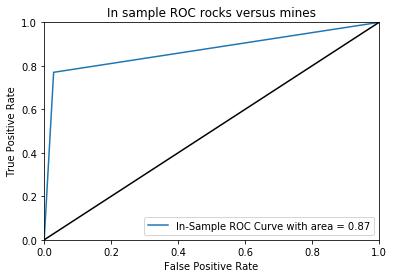

In [26]:
(fpr,tpr,thresholds) = roc_curve(y_train,p_train)
area = auc(fpr,tpr)
pl.clf() # clear current figure
pl.plot(fpr,tpr,label="In-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0,1],[0,1],'k') # this plots the random (equal probability line)
pl.xlim([0.0,1.0])
pl.ylim([0.0,1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('In sample ROC rocks versus mines')
pl.legend(loc='lower right')
pl.show()

So it looks like a bad curve, it's not a bad curve.
The reason being that we are either 0 or 1.
And it tags at the middle.
So really we're looking only at this point here.
So this gives us an area of the curve 0.87 on the n-sample ROC
curve.


In [28]:
fpr,tpr,thresholds

(array([ 0.        ,  0.02816901,  1.        ]),
 array([ 0.        ,  0.77027027,  1.        ]),
 array([2, 1, 0]))

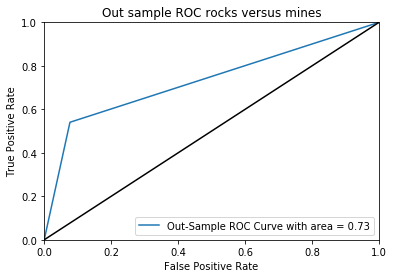

In [29]:
from sklearn.metrics import roc_curve,auc
import pylab as pl
%matplotlib inline
(fpr, tpr, thresholds) = roc_curve(y_test,p_test)
area = auc(fpr,tpr)
pl.clf() #Clear the current figure
pl.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

pl.plot([0, 1], [0, 1], 'k') #This plots the random (equal probability line)
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Out sample ROC rocks versus mines')
pl.legend(loc="lower right")
pl.show()



And that's where it's starting.
Our thresholds.
Because it doesn't mean that much here, right?
And our radio 0.78 on our out sample ROC curve.
So it's really up to us now.
We can decide whether we like this better
or the regression model results better.
That's the idea, that we can pick between these two models
and, looking at the threshold, the costs, and all that kind
of stuff that we saw before, to decide
whether one or the other methodology was better for us.

That's the idea, that we can pick between these two models
and, looking at the threshold, the costs, and all that kind
of stuff that we saw before, to decide
whether one or the other methodology was better for us.
And it curves right across validation
to see how well it is.

And there are other methods for improving the result
on a decision tree.
There's __gradient boosting models
that use gradient descent__, etc.
to figure out whether--
to sort of work on your tree and make it better.
We're not going to do all those.
We don't have the time.
But it's a good idea to take a look at them for yourself.
All right?
And all these are available in SK Learn.